In [2]:
import random
from deap import base, creator, tools, algorithms
from timeit import default_timer as timer
import numpy

def checkChromosom(individual):

    labirynth = [[1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
                 [0, 0, 1, 1, 1, 0, 1, 0, 0, 1],
                 [1, 1, 1, 0, 1, 0, 1, 1, 1, 1],
                 [1, 0, 1, 0, 0, 1, 1, 0, 0, 1],
                 [1, 1, 0, 0, 1, 1, 1, 0, 1, 1],
                 [1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
                 [1, 0, 1, 1, 0, 0, 1, 0, 1, 1],
                 [1, 0, 0, 0, 1, 1, 1, 0, 0, 1],
                 [1, 0, 1, 0, 0, 1, 0, 1, 0, 1],
                 [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
                 ]
    # 0 - dół
    # 1 - lewo
    # 2 - prawo
    # 3 - góra
    x = 0
    y = 0
    finish = (10, 10)
    position = []
    amountOfMoves = 0
    extra = 0
    path = []
    for move in individual:
        if move == 0 and y + 1 < 10 and labirynth[y + 1][x] != 0 and str(y + 1) + str(x) not in position:
            position.append(str(y + 1) + str(x))
            y += 1
            amountOfMoves += 1
            path.append("dół")
        elif move == 3 and y - 1 >= 0 and labirynth[y - 1][x] != 0 and str(y - 1) + str(x) not in position:
            position.append(str(y - 1) + str(x))
            y -= 1
            amountOfMoves += 1
            path.append("góra")
        elif move == 1 and x - 1 >= 0 and labirynth[y][x - 1] != 0 and str(y) + str(x - 1) not in position:
            position.append(str(y) + str(x - 1))
            x -= 1
            amountOfMoves += 1
            path.append("lewo")
        elif move == 2 and x + 1 < 10 and labirynth[y][x + 1] != 0 and str(y) + str(x + 1) not in position:
            position.append(str(y) + str(x + 1))
            x += 1
            amountOfMoves += 1
            path.append("prawo")
        else:
            break
    if x == 9 and y == 9:
        extra = 40 - amountOfMoves
    return {"value": (200 - ((finish[0] - y - 1) ** 2 + (finish[1] - x - 1) ** 2)) + extra,
            "amount of moves": amountOfMoves,
            "path": path}


def evalOneMax(individual):
    return checkChromosom(individual)["value"],

def withoutElitism(ind,pop,cxpb,mutpb,ngen):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 3)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=ind)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", evalOneMax)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    pop = toolbox.population(n=pop)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof,
                                       verbose=True)

    return pop, logbook, hof


def elitism(ind,pop,mu,lambda_,cxpb,mutpb,ngen):
    
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 3)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=ind)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", evalOneMax)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    pop = toolbox.population(n=pop)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)


    pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu=mu, lambda_=lambda_, cxpb=cxpb, mutpb=mutpb, ngen=ngen,
                                             stats=stats,halloffame=hof,verbose=True)

    return pop, logbook, hof




In [64]:
# Algorytm genetyczny input=20, pop=2000, cxpb=0.65, mutpb=0.15, ngen=30, 
#brak elityzmu, krzyżowanie: cxTwoPoint, selekcja: selTournament 

startG = timer()
pop, log_20_bez, hof = withoutElitism(20,2000,0.65,0.15,30)
stopG = timer()
time_20_bez = stopG - startG
chromosom = checkChromosom(hof[0])

print("Czas trwania: " + str(time_20_bez) + "s")
print("Ilość ruchów: " + str(chromosom["amount of moves"]))
print("Ścieżka: ", *chromosom["path"])

gen	nevals	avg   	min	max
0  	2000  	42.843	38 	115
1  	1436  	49.8815	38 	115
2  	1469  	62.1055	38 	115
3  	1381  	75.285 	38 	126
4  	1395  	87.874 	38 	127
5  	1428  	101.273	38 	142
6  	1398  	109.358	38 	142
7  	1358  	113.352	38 	148
8  	1400  	116.215	38 	155
9  	1404  	118.977	38 	159
10 	1372  	123.231	38 	166
11 	1391  	126.678	38 	166
12 	1396  	131.359	38 	166
13 	1394  	138.568	38 	174
14 	1414  	146.336	38 	180
15 	1409  	152.46 	38 	190
16 	1415  	157.948	38 	190
17 	1437  	161.495	38 	190
18 	1375  	165.19 	38 	191
19 	1401  	169.233	38 	196
20 	1393  	174.187	38 	199
21 	1417  	179.151	38 	199
22 	1375  	180.754	38 	199
23 	1412  	182.178	38 	199
24 	1418  	184.488	38 	220
25 	1440  	185.55 	38 	220
26 	1442  	187.512	38 	220
27 	1406  	190.78 	38 	220
28 	1433  	192.821	38 	220
29 	1400  	195.454	38 	220
30 	1425  	199.851	38 	220
Czas trwania: 4.266667400000074s
Ilość ruchów: 20
Ścieżka:  prawo prawo dół prawo prawo góra prawo prawo dół dół dół dół dół prawo prawo d

In [215]:
# Algorytm genetyczny input=30, pop=4000, cxpb=0.6, mutpb=0.15, ngen=30,
# brak elityzmu, krzyżowanie: cxTwoPoint, selekcja: selTournament 

startG = timer()
pop, log_30_bez, hof = withoutElitism(30,4000,0.6,0.15,30)
stopG = timer()
time_30_bez = stopG - startG
chromosom = checkChromosom(hof[0])

print("Czas trwania: " + str(time_30_bez) + "s")
print("Ilość ruchów: " + str(chromosom["amount of moves"]))
print("Ścieżka: ", *chromosom["path"])

gen	nevals	avg    	min	max
0  	4000  	42.2945	38 	127
1  	2574  	48.941 	38 	127
2  	2669  	61.1345	38 	142
3  	2636  	74.838 	38 	142
4  	2694  	87.9663	38 	142
5  	2641  	101.541	38 	166
6  	2636  	112.545	38 	166
7  	2703  	120.159	38 	166
8  	2651  	124.774	38 	166
9  	2676  	128.167	38 	182
10 	2543  	134.079	38 	182
11 	2631  	142.717	38 	187
12 	2633  	149.63 	38 	191
13 	2658  	157.323	38 	191
14 	2624  	164.007	38 	191
15 	2663  	169.009	38 	196
16 	2586  	174.687	38 	199
17 	2596  	178.154	38 	199
18 	2649  	180.476	38 	199
19 	2631  	182.271	38 	199
20 	2639  	182.307	38 	220
21 	2676  	183.252	38 	218
22 	2678  	184.782	38 	220
23 	2524  	184.637	38 	220
24 	2613  	187.259	38 	220
25 	2654  	188.978	38 	220
26 	2688  	192.138	38 	220
27 	2672  	193.19 	38 	220
28 	2591  	198.401	38 	220
29 	2661  	203.974	38 	220
30 	2674  	209.145	38 	220
Czas trwania: 11.19648369999959s
Ilość ruchów: 20
Ścieżka:  prawo prawo dół prawo prawo góra prawo prawo dół dół dół dół dół prawo prawo

In [213]:
# Algorytm genetyczny input=40, pop=5000, cxpb=0.65, mutpb=0.2, ngen=30,
# brak elityzmu, krzyżowanie: cxTwoPoint, selekcja: selTournament 

startG = timer()
pop, log_40_bez, hof = withoutElitism(40,5000,0.65,0.2,30)
stopG = timer()
time_40_bez = stopG - startG
chromosom = checkChromosom(hof[0])

print("Czas trwania: " + str(time_40_bez) + "s")
print("Ilość ruchów: " + str(chromosom["amount of moves"]))
print("Ścieżka: ", *chromosom["path"])

gen	nevals	avg    	min	max
0  	5000  	42.7162	38 	126
1  	3872  	49.676 	38 	126
2  	3752  	62.2394	38 	126
3  	3801  	76.4206	38 	126
4  	3814  	90.7642	38 	126
5  	3856  	104.215	38 	127
6  	3865  	112.064	38 	127
7  	3840  	115.248	38 	127
8  	3833  	118.78 	38 	127
9  	3809  	122.539	38 	127
10 	3794  	123.441	38 	142
11 	3785  	123.334	38 	166
12 	3786  	123.221	38 	180
13 	3785  	123.447	38 	187
14 	3697  	124.328	38 	187
15 	3788  	126.789	38 	187
16 	3876  	131.368	38 	187
17 	3862  	139.909	38 	187
18 	3831  	150.864	38 	190
19 	3770  	159.388	38 	191
20 	3729  	167.204	38 	190
21 	3777  	173.082	38 	199
22 	3789  	175.935	38 	199
23 	3862  	177.197	38 	199
24 	3734  	178.859	38 	199
25 	3813  	179.043	38 	220
26 	3760  	180.294	38 	220
27 	3787  	182.552	38 	220
28 	3830  	184.336	38 	220
29 	3778  	187.186	38 	220
30 	3814  	190.239	38 	220
Czas trwania: 14.647006799999872s
Ilość ruchów: 20
Ścieżka:  prawo prawo dół prawo prawo góra prawo prawo dół dół dół dół dół prawo praw

In [5]:
# Algorytm genetyczny input=20, pop=3000, mu=300, lambda_=2900, cxpb=0.55, mutpb=0.15, ngen=30,
# elityzm, krzyżowanie: cxTwoPoint, selekcja: selTournament 

startG = timer()
pop, log_20_z, hof = elitism(20,3000,300,2900,0.55,0.15,30)
stopG = timer()
time_20_z = stopG - startG
chromosom = checkChromosom(hof[0])

print("Czas trwania: " + str(time_20_z) + "s")
print("Ilość ruchów: " + str(chromosom["amount of moves"]))
print("Ścieżka: ", *chromosom["path"])

gen	nevals	avg    	min	max
0  	3000  	42.4813	38 	115
1  	2018  	48.44  	38 	115
2  	2006  	59.5933	38 	115
3  	2038  	70.1267	38 	115
4  	2025  	77.7633	55 	115
5  	2014  	87.8033	70 	115
6  	2027  	98.5633	70 	126
7  	2001  	105.837	87 	126
8  	2020  	112.297	100	127
9  	2027  	116.3  	100	127
10 	2012  	119.307	111	147
11 	2062  	123.21 	115	159
12 	1987  	126.523	115	159
13 	2081  	128.4  	126	166
14 	2056  	132.1  	126	166
15 	2038  	141.003	126	182
16 	2032  	152.963	127	187
17 	2093  	162.133	142	191
18 	2033  	168.697	155	191
19 	2044  	176.223	159	191
20 	2022  	181.613	159	191
21 	1984  	183.113	180	191
22 	2022  	185.017	182	191
23 	2081  	187.46 	182	191
24 	2060  	189.587	182	191
25 	2014  	190.53 	187	196
26 	1965  	191.21 	190	220
27 	2045  	191.72 	190	220
28 	2041  	192.987	191	220
29 	2010  	195.047	191	220
30 	2055  	199.1  	191	220
Czas trwania: 6.244225100000001s
Ilość ruchów: 20
Ścieżka:  prawo prawo dół prawo prawo góra prawo prawo dół dół dół dół dół prawo prawo

In [211]:
# Algorytm genetyczny input=30, pop=4000, mu=400, lambda_=3900, cxpb=0.55, mutpb=0.15, ngen=30,
# elityzm, krzyżowanie: cxTwoPoint, selekcja: selTournament 

startG = timer()
pop, log, hof = elitism(30,4000,400,3900,0.55,0.15,30)
stopG = timer()
time_30_z = stopG - startG
chromosom = checkChromosom(hof[0])

print("Czas trwania: " + str(time_30_z) + "s")
print("Ilość ruchów: " + str(chromosom["amount of moves"]))
print("Ścieżka: ", *chromosom["path"])

gen	nevals	avg    	min	max
0  	4000  	42.6655	38 	126
1  	2693  	50.245 	38 	115
2  	2708  	64.8925	38 	115
3  	2721  	80.3875	55 	115
4  	2783  	94.3025	70 	115
5  	2725  	104.213	70 	126
6  	2737  	110.645	100	126
7  	2753  	114.745	102	126
8  	2736  	115.578	115	126
9  	2766  	116.582	55 	126
10 	2745  	118.62 	115	155
11 	2765  	122.575	115	155
12 	2737  	126.873	115	155
13 	2758  	129.725	126	155
14 	2740  	133.623	126	166
15 	2731  	143.17 	126	180
16 	2731  	152.137	126	175
17 	2731  	156.725	126	180
18 	2737  	159.735	155	180
19 	2720  	164.873	142	180
20 	2742  	170.227	155	182
21 	2751  	175.088	155	187
22 	2735  	178.785	166	187
23 	2783  	180.412	175	187
24 	2774  	181.127	180	187
25 	2682  	181.96 	180	187
26 	2737  	182.702	103	190
27 	2766  	184.382	180	196
28 	2729  	186.145	182	196
29 	2733  	187.347	182	220
30 	2690  	187.958	175	220
Czas trwania: 10.533438599999954s
Ilość ruchów: 20
Ścieżka:  prawo prawo dół prawo prawo góra prawo prawo dół dół dół dół dół prawo praw

In [62]:
# Algorytm genetyczny input=40, pop=5000, mu=500, lambda_=4500, cxpb=0.7, mutpb=0.2, ngen=30,
# elityzm, krzyżowanie: cxTwoPoint, selekcja: selTournament 

startG = timer()
pop, log, hof = elitism(40,5000,500,4500,0.7,0.2,30)
stopG = timer()
time_40_z = stopG - startG
chromosom = checkChromosom(hof[0])

print("Czas trwania: " + str(time_40_z) + "s")
print("Ilość ruchów: " + str(chromosom["amount of moves"]))
print("Ścieżka: ", *chromosom["path"])

gen	nevals	avg   	min	max
0  	5000  	42.561	38 	126
1  	4082  	48.722	38 	110
2  	4022  	59.108	38 	110
3  	4023  	69.63 	38 	110
4  	4052  	79.078	55 	127
5  	4063  	91.312	70 	127
6  	4049  	102.91	70 	127
7  	4103  	110.862	87 	166
8  	4049  	117.92 	100	166
9  	4085  	124.734	110	166
10 	4051  	130.918	110	180
11 	4066  	137.85 	126	196
12 	4030  	150.034	103	196
13 	4034  	163.418	127	196
14 	4032  	171.424	148	199
15 	4026  	178.644	155	199
16 	4042  	185.666	166	220
17 	4062  	190.792	166	220
18 	4022  	195.054	175	220
19 	4062  	197.25 	187	220
20 	4059  	199.432	196	220
21 	4062  	202.842	126	220
22 	4035  	209.74 	196	220
23 	4065  	216.556	199	220
24 	4047  	219.19 	103	220
25 	4031  	220    	220	220
26 	4054  	219.924	182	220
27 	4038  	219.924	182	220
28 	4078  	219.658	110	220
29 	4045  	220    	220	220
30 	4003  	220    	220	220
Czas trwania: 17.50508190000005s
Ilość ruchów: 20
Ścieżka:  prawo prawo dół prawo prawo góra prawo prawo dół dół dół dół dół prawo prawo dół pra

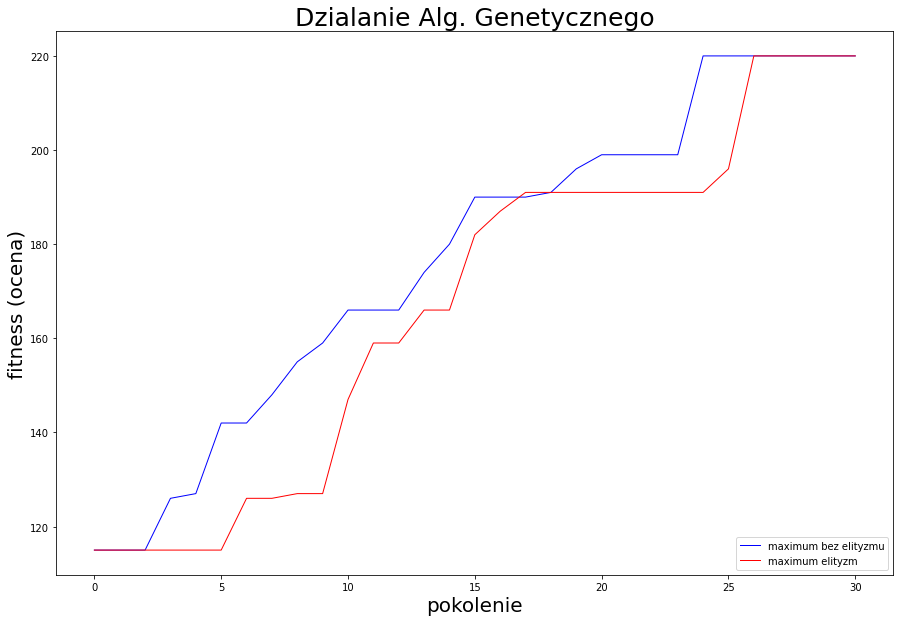

In [237]:
import matplotlib.pyplot as plt

gen, avg,max_20_bez = log_20_bez.select("gen","avg","max")
gen, avg,max_20_z = log_20_z.select("gen","avg","max")
plt.figure(figsize=(15,10))
plt.plot(gen,max_20_bez , label="maximum bez elityzmu", color="blue", linewidth=1)
plt.plot(gen, max_20_z, label="maximum elityzm", color="red", linewidth=1)
plt.title("Dzialanie Alg. Genetycznego", size=25)
plt.xlabel("pokolenie", size=20)
plt.ylabel("fitness (ocena)", size=20)
plt.legend(loc="lower right")
plt.show()


In [240]:
# Brute Force

import random
from timeit import default_timer as timer

def checkChromosom(individual):
    labirynth = \
        [[1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
         [0, 0, 1, 1, 1, 0, 1, 0, 0, 1],
         [1, 1, 1, 0, 1, 0, 1, 1, 1, 1],
         [1, 0, 1, 0, 0, 1, 1, 0, 0, 1],
         [1, 1, 0, 0, 1, 1, 1, 0, 1, 1],
         [1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
         [1, 0, 1, 1, 0, 0, 1, 0, 1, 1],
         [1, 0, 0, 0, 1, 1, 1, 0, 0, 1],
         [1, 0, 1, 0, 0, 1, 0, 1, 0, 1],
         [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
         ]
    # 0 - dół
    # 1 - lewo
    # 2 - prawo
    # 3 - góra
    x = 0
    y = 0
    position = []
    amountOfMoves = 0

    for move in individual:
        if move == 0 and y + 1 < 10 and labirynth[y + 1][x] != 0 and str(y + 1) + str(x) not in position:
            position.append(str(y + 1) + str(x))
            y += 1
            amountOfMoves += 1
        elif move == 3 and y - 1 >= 0 and labirynth[y - 1][x] != 0 and str(y - 1) + str(x) not in position:
            position.append(str(y - 1) + str(x))
            y -= 1
            amountOfMoves += 1
        elif move == 1 and x - 1 >= 0 and labirynth[y][x - 1] != 0 and str(y) + str(x - 1) not in position:
            position.append(str(y) + str(x - 1))
            x -= 1
            amountOfMoves += 1
        elif move == 2 and x + 1 < 10 and labirynth[y][x + 1] != 0 and str(y) + str(x + 1) not in position:
            position.append(str(y) + str(x + 1))
            x += 1
            amountOfMoves += 1
        else:
            break
    return [amountOfMoves, (x, y)]

# Input 20

startBF = timer()

population = []
for i in range(1000000):
    chromosom = [2, 2]
    for j in range(18):
        chromosom.append(random.randint(0, 3))
    population.append(chromosom)

moves = []

for chromosom in population:
    moves.append(checkChromosom(chromosom)[0])

stopBF = timer()

timeBF_20 = stopBF - startBF
maxMoves = max(moves)
indexMax = moves.index(max(moves))
theBestChromosom = population[indexMax]
position = checkChromosom(theBestChromosom)[1]

print("Czas trwania: " + str(timeBF_20) + "s")
print("Ilość ruchów: " + str(maxMoves))
print("Pozycja: ", "x =", str(position[0]), "y =", str(position[1]))
print("Ścieżka: ", *theBestChromosom)

Czas trwania: 34.98782080000001s
Ilość ruchów: 13
Pozycja:  x = 6 y = 5
Ścieżka:  2 2 0 2 2 3 2 2 0 0 0 0 0 1 3 3 2 3 2 0


In [260]:
# Input 30

startBF = timer()

population = []
for i in range(1000000):
    chromosom = [2, 2]
    for j in range(28):
        chromosom.append(random.randint(0, 3))
    population.append(chromosom)

moves = []

for chromosom in population:
    moves.append(checkChromosom(chromosom)[0])

stopBF = timer()

timeBF_30 = stopBF - startBF
maxMoves = max(moves)
indexMax = moves.index(max(moves))
theBestChromosom = population[indexMax]
position = checkChromosom(theBestChromosom)[1]

print("Czas trwania: " + str(timeBF_30) + "s")
print("Ilość ruchów: " + str(maxMoves))
print("Pozycja: ", "x =", str(position[0]), "y =", str(position[1]))
print("Ścieżka: ", *theBestChromosom)

Czas trwania: 49.848768500000006s
Ilość ruchów: 13
Pozycja:  x = 4 y = 5
Ścieżka:  2 2 0 0 1 1 0 0 2 0 2 2 2 1 2 2 2 2 2 3 0 0 0 2 1 0 3 0 3 2


In [247]:
# Input 40

startBF = timer()

population = []
for i in range(1000000):
    chromosom = [2, 2]
    for j in range(38):
        chromosom.append(random.randint(0, 3))
    population.append(chromosom)

moves = []

for chromosom in population:
    moves.append(checkChromosom(chromosom)[0])

stopBF = timer()

timeBF_40 = stopBF - startBF
maxMoves = max(moves)
indexMax = moves.index(max(moves))
theBestChromosom = population[indexMax]
position = checkChromosom(theBestChromosom)[1]

print("Czas trwania: " + str(timeBF_40) + "s")
print("Ilość ruchów: " + str(maxMoves))
print("Pozycja: ", "x =", str(position[0]), "y =", str(position[1]))
print("Ścieżka: ", *theBestChromosom)

Czas trwania: 72.10002869999971s
Ilość ruchów: 14
Pozycja:  x = 4 y = 4
Ścieżka:  2 2 0 0 1 1 0 0 0 2 2 2 2 3 1 0 3 2 0 2 3 2 0 2 0 3 0 2 1 0 2 3 1 3 3 1 1 0 2 1


In [248]:
from timeit import default_timer as timer

#labirynth=[[1,  2,  3,  0,  4,  5,  6,  0,  7,  8],
#          [0,  0,  9,  10, 11, 0,  12, 0,  0,  13],
#          [14, 15, 16, 0,  17, 0,  18, 19, 20, 21],
#          [22, 0,  23, 0,  0,  24, 25, 0,  0,  26],
#          [27, 28, 0,  0,  29, 30, 31, 0,  32, 33],
#          [34, 35, 36, 37, 38, 0,  39, 40, 41, 0],
#          [42, 0,  43, 44, 0,  0,  45, 0,  46, 47],
#          [48, 0,  0,  0,  49, 50, 51, 0,  0,  52],
#          [53, 0,  54, 0,  0,  55, 0,  56, 0,  57],
#          [58, 0,  59, 60, 61, 62, 63, 64, 65, 66],]

graph = {'1': ['2'],
         '2': ['3'],
         '3': ['9'],
         '4': ['11', '5'],
         '5': ['6', '4'],
         '6': ['12', '5'],
         '7': ['8'],
         '8': ['13', '7'],
         '9': ['3', '10', '16'],
         '10': ['11', '9'],
         '11': ['17', '10', '4'],
         '12': ['6', '18'],
         '13': ['21', '8'],
         '14': ['15', '22'],
         '15': ['14', '16'],
         '16': ['15', '23', '9'],
         '17': ['11'],
         '18': ['12', '25', '19'],
         '19': ['18', '20'],
         '20': ['19', '21'],
         '21': ['13', '26', '20'],
         '22': ['14', '27'],
         '23': ['16'],
         '24': ['25', '30'],
         '25': ['18', '24', '31'],
         '26': ['21', '33'],
         '27': ['22', '34', '28'],
         '28': ['27', '35'],
         '29': ['38', '30'],
         '30': ['24', '31', '29'],
         '31': ['30', '25', '39'],
         '32': ['41', '33'],
         '33': ['26', '32'],
         '34': ['27', '35', '42'],
         '35': ['28', '36', '34'],
         '36': ['35', '43', '37'],
         '37': ['36', '44', '38'],
         '38': ['29', '37'],
         '39': ['31', '40', '45'],
         '40': ['39', '41'],
         '41': ['40', '32', '46'],
         '42': ['34', '48'],
         '43': ['36', '44'],
         '44': ['37', '43'],
         '45': ['39', '51'],
         '46': ['41', '47'],
         '47': ['46', '52'],
         '48': ['42', '53'],
         '49': ['50'],
         '50': ['55', '51', '49'],
         '51': ['50', '45'],
         '52': ['47', '57'],
         '53': ['48', '58'],
         '54': ['59'],
         '55': ['50', '62'],
         '56': ['64'],
         '57': ['52', '66'],
         '58': ['53'],
         '59': ['54', '60'],
         '60': ['59', '61'],
         '61': ['60', '62'],
         '62': ['55', '61', '63'],
         '63': ['62', '64'],
         '64': ['56', '63', '65'],
         '65': ['64', '66'],
         '66': ['57', '65'],
         }


def BFS(graph, start, goal):
    explored = []

    queue = [[start]]

    if start == goal:
        return [start]

    while queue:
        path = queue.pop(0)
        node = path[-1]

        if node not in explored:
            neighbours = graph[node]

            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)

                if neighbour == goal:
                    path.append(neighbour)
                    return path
            explored.append(node)

startBFS = timer()
path = BFS(graph, '1', '66')
stopBFS = timer()
timeBFS = stopBFS - startBFS
print("Czas trwania: " + str(timeBFS) + "s")
print("Ścieżka: ", *path)


Czas trwania: 0.00025910000022122404s
Ścieżka:  1 2 3 9 10 11 4 5 6 12 18 25 31 39 40 41 46 47 52 57 66


<font size="5">**Zestawienie algorytmów**</font>

||**Input wielkość 20/graf**|**Input wielkość 30/graf**|**Input wielkość 40/graf**|
| :- | :-: | :-: | :-: |
|**Algorytm genetyczny bez elityzmu**|<p>4,2667 sek.</p><p>(pop=2000, cxpb=0.65, mutpb=0.15, ngen=30)</p>|<p>11,1965 sek.</p><p>(pop=4000, cxpb=0.6, mutpb=0.15, ngen=30)</p>|<p>14,647 sek.</p><p>(pop=5000, cxpb=0.65, mutpb=0.2, ngen=30)</p>|
|**Algorytm genetyczny z elityzmem**|<p>6,2442 sek.</p><p>(pop=3000, mu=300,cxpb=0.55, mutpb=0.15, ngen=30)</p>|<p>10,5334 sek.</p><p>(pop=4000, mu=400, cxpb=0.55, mutpb=0.15, ngen=30)</p>|<p>17,5051 sek.</p><p>(pop=5000, mu=500, cxpb=0.7, mutpb=0.2, ngen=30)</p>|
|**Brute Force** |<p>34.9878 sek.</p><p>(pop=1000000)</p><p><font color="red"> Brak znalezionego rozw.</font></p>|<p>49,8488 sek.</p><p>(pop=1000000)</p><p><font color="red"> Brak znalezionego rozw.</font></p>|<p>72,1 sek.</p><p>(pop=1000000)</p><p><font color="red"> Brak znalezionego rozw.</font></p>|
|**Wyszuk. Wszerz**|<p>0,0003 sek.</p>|<p>0,0003 sek.</p>|<p>0,0003 sek.</p>|



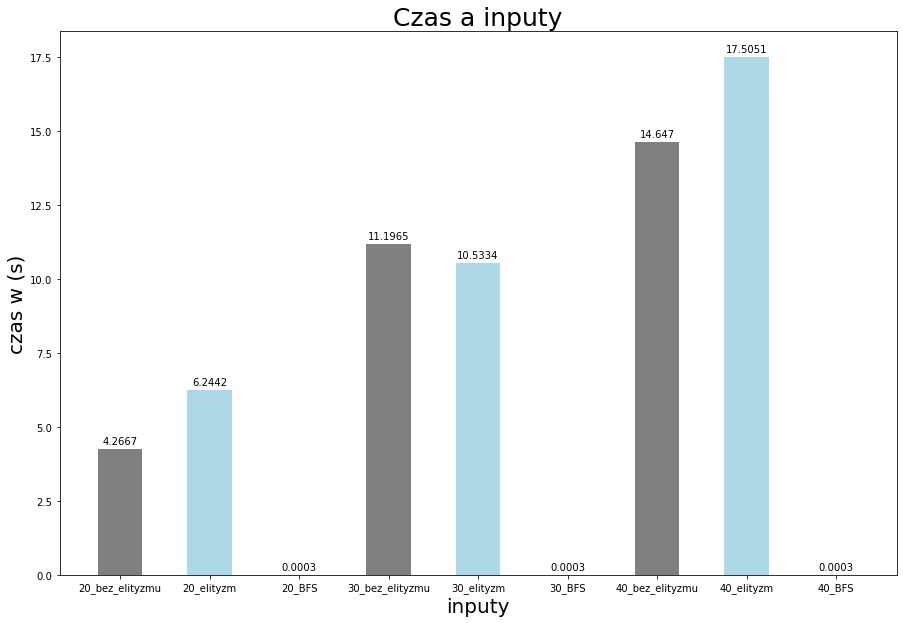

In [259]:
inputs = ["20_bez_elityzmu","20_elityzm","20_BFS", "30_bez_elityzmu",
          "30_elityzm","30_BFS", "40_bez_elityzmu","40_elityzm", "40_BFS"]
time =list(map(lambda time: time.__round__(4),[time_20_bez, time_20_z, timeBFS, time_30_bez,
                                               time_30_z, timeBFS, time_40_bez, time_40_z, timeBFS] )) 
fig, ax = plt.subplots(figsize=(15, 10))
chart = ax.bar(inputs, time, width=0.5, color=["grey", "lightblue","darkgrey"])
plt.title('Czas a inputy',size=25)
plt.xlabel('inputy',size=20)
plt.ylabel('czas w (s)',size=20)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(chart)
plt.show()